# Project Summary: Text Mining & Visualization of Classical Chinese Prose
This project explores the application of text mining and visualization techniques to classical Chinese prose, with a focus on works such as Zhuangzi's "Butterfly Dream" and the Analects of Confucius. By leveraging natural language processing tools like jieba for segmentation, and visualization libraries such as matplotlib and wordcloud, the project aims to uncover patterns, keyword frequencies, and co-occurrence relationships within these ancient texts.

**Potential Findings:**
- Identification of the most frequent words and characters in classical Chinese prose.
- Visualization of word distributions and relationships through word clouds and co-occurrence networks.
- Insights into the thematic structure and linguistic features of the texts.

**Contributions:**
- Demonstrates a workflow for processing and analyzing classical Chinese texts using modern computational tools.
- Provides visual representations that make complex textual data more accessible and interpretable.
- Offers a foundation for further digital humanities research on Chinese literature, enabling comparative studies and deeper literary analysis.

In [1]:
# Install packages
# pip install networkx

In [2]:
# Import necessary libraries
import jieba                            # For Chinese text segmentation
from collections import Counter         # For counting word frequencies
import matplotlib.pyplot as plt         # For creating visualizations
from wordcloud import WordCloud         # For generating word clouds
import string                           # For string operations
import re                               # For regular expressions
import networkx as nx                   # For network analysis 
from itertools import combinations      # For generating combinations
import matplotlib.colors as mcolors     # For color mapping
import matplotlib.cm as cm              # For colormap handling

### Use Zhuangzi: Butterfly Dream as Chinese text

In [3]:
# Input classical Chinese text
text = """昔者莊周夢為蝴蝶，栩栩然蝴蝶也，自喻適志與。不知周也。俄然覺，則蘧蘧然周也。不知周之夢為蝴蝶與，蝴蝶之夢為周與？"""

In [4]:
# Tokenize
words = jieba.lcut(text)

# Remove punctuation and non-word characters
punct = set(string.punctuation)
punct.update('，。！？；：“”‘’、（）《》【】—…·『』「」')
words = [w for w in words if w.strip() and w not in punct and not re.match(r'^\W+$', w)]    

# Count each Chinese character
all_chars = [char for word in words for char in word if '\u4e00' <= char <= '\u9fff']       # Chinese character range
char_counts = Counter(all_chars)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\henle\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\henle\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built successfully.
Loading model cost 0.613 seconds.
Prefix dict has been built successfully.


In [5]:
# Print top 15 most common Chinese characters
print("Top 15 Chinese characters by count:")
for char, count in char_counts.most_common(15):
    print(f"{char}: {count}")

Top 15 Chinese characters by count:
周: 5
蝴: 4
蝶: 4
夢: 3
為: 3
然: 3
也: 3
與: 3
栩: 2
不: 2
知: 2
蘧: 2
之: 2
昔: 1
者: 1


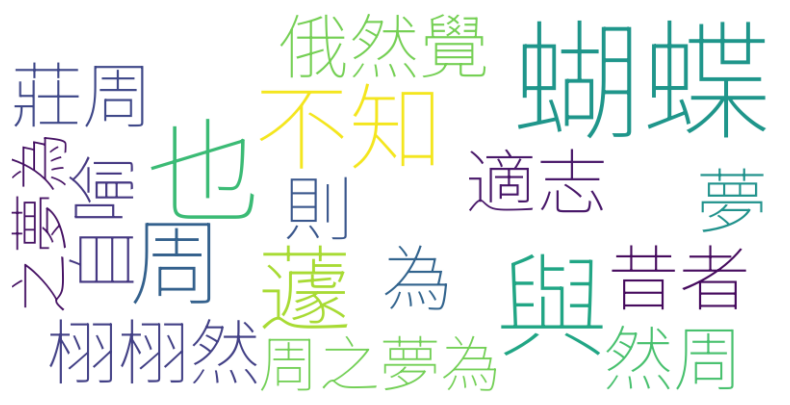

In [6]:
# Word cloud visualization
wc = WordCloud(
    font_path = r"H:\Yujie\Digital Humanity\Text Mining & Visualization of Classical Chinese Prose\NotoSansSC-VariableFont_wght.ttf",
    width = 800,
    height = 400,
    background_color = "white"
)
wc.generate(" ".join(words))

# Display the word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Use The Analects of Confucius as Chinese text

In [7]:
# Read a txt file with The Analects of Confucius text (the file is with Chinese text and encoded in gbk)
with open('The Analects of Confucius.txt', 'r', encoding = 'gbk') as f:      # encoding = gbk - setting the file encoding for documents to GBK (Guobiao Kuozhan)
    text = f.read()

# Tokenize 
words = jieba.lcut(text)

# Remove punctuation and non-word characters
punct = set(string.punctuation)
punct.update('，。！？；：“”‘’、（）《》【】—…·『』「」')
words = [w for w in words if w.strip() and w not in punct and not re.match(r'^\W+$', w)]

# Count word frequencies
counts = Counter(words)

# Print top 20 words ranked by count
print("Top 20 words by count:")
for word, count in counts.most_common(20):
    print(f"{word}: {count}")

Top 20 words by count:
曰: 724
也: 524
子: 432
之: 311
矣: 169
而: 165
与: 125
不: 119
君子: 103
吾: 99
则: 82
有: 81
孔子: 69
人: 60
者: 60
焉: 56
乎: 54
其: 54
为: 52
如: 51


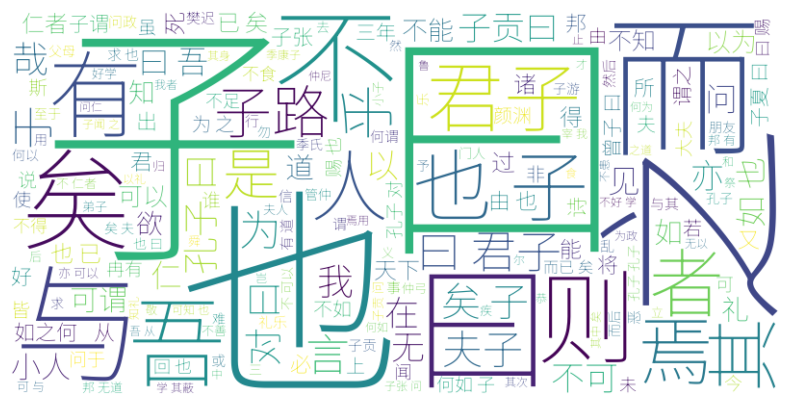

In [8]:
# Generate word cloud
wc = WordCloud(
    font_path = r"H:\Yujie\Digital Humanity\Text Mining & Visualization of Classical Chinese Prose\NotoSansSC-VariableFont_wght.ttf",
    width=800,
    height=400,
    background_color="white"
)
wc.generate(" ".join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
# Get the top N most frequent words (jieba tokens)
top_words = [word for word, _ in counts.most_common(5)]                     # Change 5 to any number you want

for word in top_words:
    print(f"Occurrences of '{word}':")
    positions = [i for i in range(len(text)) if text.startswith(word, i)]
    print(positions)  # List of start indices in the text
    # Optionally, print the context around each occurrence
    for pos in positions:
        print(text[max(0, pos-10): pos + len(word) + 10])
    print('-' * 40)

Occurrences of '曰':
[18, 65, 129, 149, 188, 220, 263, 299, 317, 359, 386, 414, 457, 497, 553, 595, 641, 659, 681, 709, 741, 770, 799, 814, 829, 870, 931, 945, 957, 966, 975, 1010, 1033, 1075, 1112, 1152, 1188, 1211, 1233, 1253, 1278, 1303, 1324, 1365, 1420, 1433, 1484, 1522, 1533, 1577, 1628, 1681, 1755, 1785, 1820, 1854, 1888, 1899, 1907, 1930, 1968, 1994, 2003, 2012, 2038, 2090, 2122, 2168, 2191, 2213, 2237, 2273, 2299, 2314, 2351, 2375, 2417, 2440, 2476, 2495, 2506, 2532, 2544, 2553, 2582, 2642, 2689, 2715, 2792, 2830, 2854, 2891, 2912, 2932, 3018, 3099, 3127, 3146, 3176, 3208, 3239, 3259, 3293, 3326, 3342, 3354, 3364, 3385, 3408, 3434, 3467, 3491, 3516, 3548, 3573, 3592, 3614, 3634, 3767, 3777, 3785, 3793, 3807, 3819, 3860, 3880, 3908, 3942, 3954, 3987, 4025, 4061, 4073, 4101, 4128, 4155, 4200, 4212, 4220, 4240, 4263, 4284, 4346, 4361, 4434, 4458, 4488, 4529, 4536, 4544, 4581, 4602, 4622, 4629, 4637, 4666, 4682, 4725, 4762, 4788, 4819, 4875, 4887, 4911, 4926, 4937, 4963, 4992, 5030

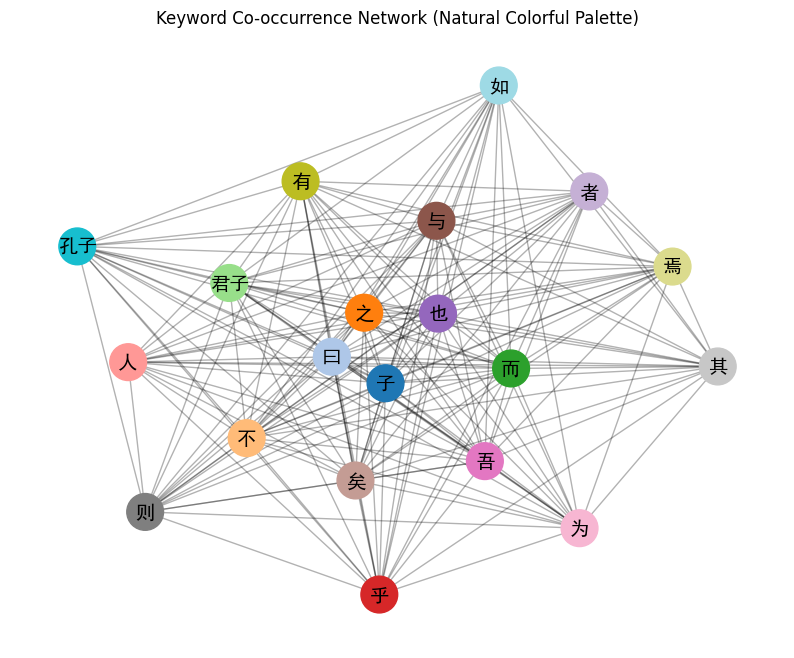

In [10]:
# Create a keyword co-occurrence network with a natural colorful palette 
# Select top N keywords to include in the network
top_n = 20
top_keywords = set([word for word, _ in counts.most_common(top_n)])

# Build co-occurrence edges using a sliding window
window_size = 5
edges = []
for i in range(len(words) - window_size + 1):
    window = words[i:i + window_size]
    # Only keep keywords in the window
    window_keywords = [w for w in window if w in top_keywords]
    # Add all unique pairs
    for pair in combinations(set(window_keywords), 2):
        edges.append(tuple(sorted(pair)))

# Count edge frequencies
edge_counts = Counter(edges)

# Create the graph
G = nx.Graph()
for (w1, w2), weight in edge_counts.items():
    G.add_edge(w1, w2, weight=weight)

# Assign node colors using a natural colorful palette
cmap = plt.colormaps['tab20']                                           
node_colors = [cmap(i % cmap.N) for i, _ in enumerate(G.nodes())]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_family='SimHei', font_size=14)
plt.title('Keyword Co-occurrence Network (Natural Colorful Palette)')
plt.axis('off')
plt.show()

### Summary: Keyword Co-occurrence Network Analysis
The keyword co-occurrence network visualizes how frequently the most important words from the classical Chinese text appear together within a short context window. Each node represents a top keyword, and edges indicate that two keywords co-occur within the same window, with edge thickness reflecting the frequency of co-occurrence.

**Purpose:**
- To reveal the relationships and associations between key concepts in the text.
- To identify central themes and clusters of related ideas based on word proximity.
- To provide a structural overview of how the text’s main ideas are interconnected.

**Potential Findings:**
- Central or highly connected keywords often represent core themes or recurring motifs in the text.
- Strongly linked pairs of keywords may indicate important phrases, concepts, or narrative elements.
- Clusters of interconnected keywords can highlight thematic groupings or sections within the text.
- The overall network structure offers insights into the complexity and organization of the text’s content.

This analysis helps uncover hidden patterns and relationships in classical Chinese prose, supporting deeper literary and linguistic interpretation.